# Data overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# (Optional) Evaluate the model on the validation set
import sklearn.metrics as metrics 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_pickle('SMOTETomek_df.pkl')

In [3]:
df

,state,day,job_category,age_category,location,age,count_acct_num,count_zip,city_pop_log,amt_log,category_gas transport,category_grocery pos,category_shopping net,category_shopping pos,time_category_Evening,time_category_Morning,is_fraud
0,0,12,15,0,1,27,147,147,9.538276,2.157559,False,False,False,True,False,False,0
1,1,21,15,1,1,25,63,151,10.819578,5.504559,False,False,True,False,False,False,0
2,1,27,0,0,1,71,72,72,9.534523,2.244956,False,False,False,True,False,True,0
3,1,29,11,0,1,31,62,62,10.123065,0.845868,False,False,False,True,False,False,0
4,5,29,14,0,1,48,54,54,9.441928,2.634762,False,False,False,True,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347741,4,7,7,0,1,46,140,600,10.561862,5.317385,False,True,False,False,False,False,1
347742,4,12,6,0,1,27,32,249,12.419287,5.557323,False,False,False,True,True,False,1
347743,5,9,5,1,0,18,42,42,7.372118,5.655081,True,False,False,False,False,False,1
347744,1,26,5,0,1,53,12,12,11.564768,6.717874,False,False,True,False,True,False,1


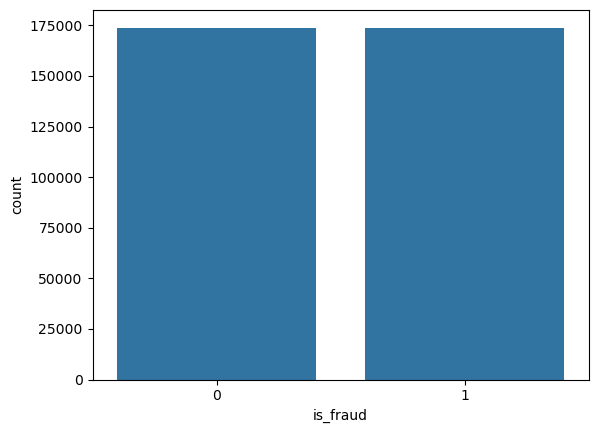

In [4]:
sns.countplot(x='is_fraud', data=df)
plt.show()

In [5]:
df.shape

(347746, 17)

Use head, describe and info to get to know the data

In [6]:
df.head()

,state,day,job_category,age_category,location,age,count_acct_num,count_zip,city_pop_log,amt_log,category_gas transport,category_grocery pos,category_shopping net,category_shopping pos,time_category_Evening,time_category_Morning,is_fraud
0,0,12,15,0,1,27,147,147,9.538276,2.157559,False,False,False,True,False,False,0
1,1,21,15,1,1,25,63,151,10.819578,5.504559,False,False,True,False,False,False,0
2,1,27,0,0,1,71,72,72,9.534523,2.244956,False,False,False,True,False,True,0
3,1,29,11,0,1,31,62,62,10.123065,0.845868,False,False,False,True,False,False,0
4,5,29,14,0,1,48,54,54,9.441928,2.634762,False,False,False,True,True,False,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347746 entries, 0 to 347745
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   state                   347746 non-null  int32  
 1   day                     347746 non-null  int64  
 2   job_category            347746 non-null  int32  
 3   age_category            347746 non-null  int32  
 4   location                347746 non-null  int32  
 5   age                     347746 non-null  int64  
 6   count_acct_num          347746 non-null  int64  
 7   count_zip               347746 non-null  int64  
 8   city_pop_log            347746 non-null  float64
 9   amt_log                 347746 non-null  float64
 10  category_gas transport  347746 non-null  bool   
 11  category_grocery pos    347746 non-null  bool   
 12  category_shopping net   347746 non-null  bool   
 13  category_shopping pos   347746 non-null  bool   
 14  time_category_Evenin

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
state,347746.0,4.387288,1.996574,0.000000,4.000000,5.000000,6.000000,8.000000
day,347746.0,14.294134,8.607515,0.000000,7.000000,14.000000,22.000000,29.000000
job_category,347746.0,7.666541,4.535402,0.000000,5.000000,7.000000,11.000000,15.000000
age_category,347746.0,0.119872,0.324812,0.000000,0.000000,0.000000,0.000000,1.000000
location,347746.0,0.948045,0.221936,0.000000,1.000000,1.000000,1.000000,1.000000
age,347746.0,47.386894,19.208975,16.000000,31.000000,45.000000,60.000000,97.000000
count_acct_num,347746.0,89.419234,47.751549,4.000000,53.000000,87.000000,129.000000,206.000000
count_zip,347746.0,221.500549,159.281180,4.000000,99.000000,186.000000,293.000000,984.000000
city_pop_log,347746.0,10.663652,1.882105,4.094345,9.467228,10.334295,11.715752,14.733680
amt_log,347746.0,4.422578,1.867037,0.000000,2.971952,4.499254,6.101636,9.711013


Use distplot to find the pricing distribution

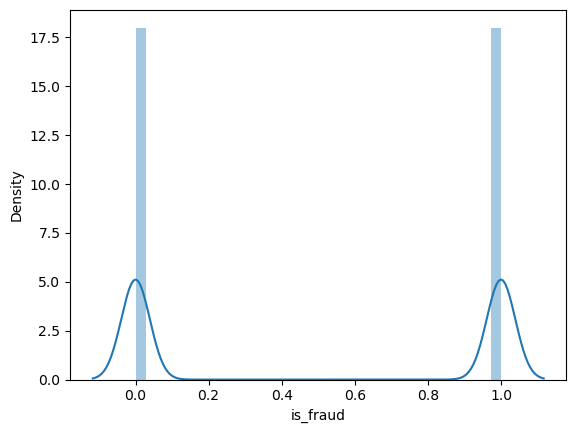

In [9]:
sns.distplot(df.is_fraud)
plt.show()

Display data correlation

In [10]:
df.corr()

,state,day,job_category,age_category,location,age,count_acct_num,count_zip,city_pop_log,amt_log,category_gas transport,category_grocery pos,category_shopping net,category_shopping pos,time_category_Evening,time_category_Morning,is_fraud
state,1.000000,-0.017354,-0.003036,-0.065942,-0.135537,0.059072,-0.072491,-0.044059,0.002595,0.022010,-0.024168,0.010085,-0.062505,-0.009479,0.025312,-0.021830,0.055066
day,-0.017354,1.000000,-0.018658,-0.002708,-0.023095,0.011152,0.013812,-0.012144,0.053972,-0.068683,0.022167,-0.053550,-0.112488,0.129624,-0.044019,0.013663,-0.088221
job_category,-0.003036,-0.018658,1.000000,0.030269,0.048120,-0.077161,0.053035,0.057630,0.010808,-0.035489,0.039803,-0.023729,0.026289,-0.020712,-0.013199,-0.034145,-0.035700
age_category,-0.065942,-0.002708,0.030269,1.000000,-0.110670,-0.485500,0.263120,0.107321,-0.040789,-0.043966,0.051494,0.061031,0.214062,-0.221138,0.032265,-0.086350,-0.006808
location,-0.135537,-0.023095,0.048120,-0.110670,1.000000,0.036683,0.016238,0.192945,0.438471,0.015763,-0.098920,-0.006275,-0.062875,0.089753,0.036134,-0.072138,-0.000920
age,0.059072,0.011152,-0.077161,-0.485500,0.036683,1.000000,-0.483382,-0.276885,-0.050491,0.150459,0.034570,0.069268,-0.230363,0.294811,-0.053543,0.253807,0.086583
count_acct_num,-0.072491,0.013812,0.053035,0.263120,0.016238,-0.483382,1.000000,0.419980,0.061735,-0.233606,-0.123063,-0.131866,0.156832,-0.078394,-0.057456,-0.146518,-0.284389
count_zip,-0.044059,-0.012144,0.057630,0.107321,0.192945,-0.276885,0.419980,1.000000,0.452505,-0.100534,-0.111618,-0.034327,0.006356,-0.040716,-0.033301,-0.055549,-0.071701
city_pop_log,0.002595,0.053972,0.010808,-0.040789,0.438471,-0.050491,0.061735,0.452505,1.000000,-0.033205,-0.076198,-0.008194,-0.053074,0.021929,0.009967,-0.005950,-0.018009
amt_log,0.022010,-0.068683,-0.035489,-0.043966,0.015763,0.150459,-0.233606,-0.100534,-0.033205,1.000000,0.093435,0.259250,-0.056074,-0.074967,0.281098,-0.095970,0.644640


Display correlation with heatmap

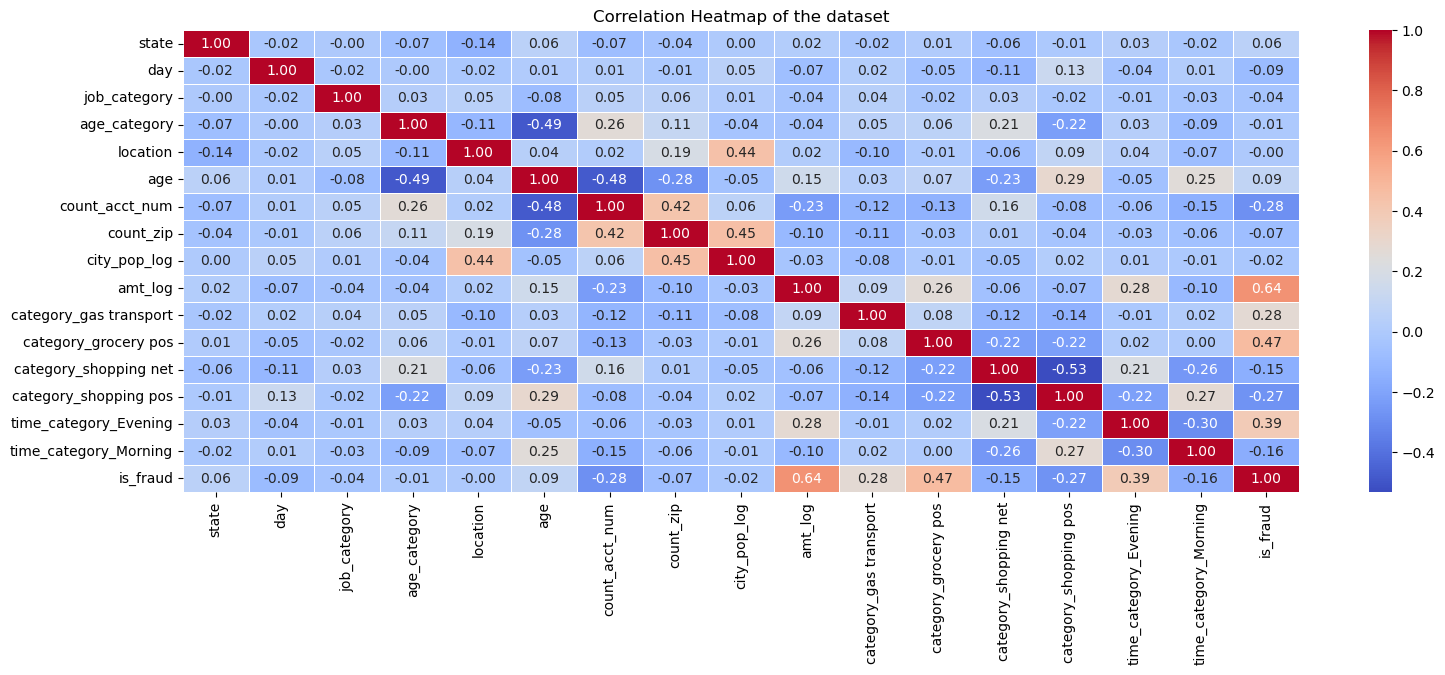

In [11]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the plot
plt.title("Correlation Heatmap of the dataset")
plt.show()

### Split the dataset to X - dataset without the target value and y - the target value

In [12]:
y = df['is_fraud']
X = df.drop(columns=['is_fraud'])

## Metrics

In [13]:
models_list = pd.DataFrame()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import sklearn.metrics as metrics 

In [15]:
def classificationMetrics(y, yhat):
    prf1 = metrics.precision_recall_fscore_support(y,yhat)
    res = {'Accuracy': metrics.accuracy_score(y,yhat),
           'Precision':prf1[0][1],
           'Recall': prf1[1][1],
           'f1-score': prf1[2][1],
           'Log-loss': metrics.log_loss(y,yhat),
           'AUC': metrics.roc_auc_score(y,yhat)
          }
        
    return res

# Classification Models

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,  export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [17]:
# y=df['is_fraud']
# X = df.drop(columns=['is_fraud'])

In [18]:
X.shape

(347746, 16)

In [19]:
y.shape

(347746,)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split into train+val and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split train+val into train and val sets (75% train, 25% val from the train+val set)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

In [22]:
X_train.shape

(208647, 16)

In [23]:
X_val.shape

(69549, 16)

In [24]:
y_train.shape

(208647,)

In [25]:
y_val.shape

(69549,)

In [26]:
import sklearn.metrics as skmet
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Logistic Regression

In [27]:
mod1 = LogisticRegression(max_iter=1000)
mod1.fit(X_train,y_train)

pred1 = mod1.predict(X_val)

In [28]:
pd.crosstab(y_val, pred1)

col_0,0,1
is_fraud,,
0,32684,2118
1,2613,32134


In [29]:
model_dict = {'model': "Logistic Regression"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_val, pred1)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,Logistic Regression,0.931976,0.938164,0.924799,0.931434,2.451833,0.93197


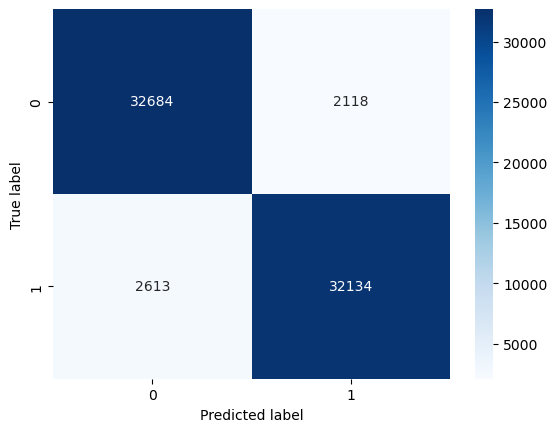

In [30]:
# Compute the confusion matrix
cm_skmet = confusion_matrix(y_val, pred1)

# Plot the confusion matrix with custom formatting
sns.heatmap(cm_skmet, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [31]:
print(classification_report(y_val, pred1, digits=4))

              precision    recall  f1-score   support

           0     0.9260    0.9391    0.9325     34802
           1     0.9382    0.9248    0.9314     34747

    accuracy                         0.9320     69549
   macro avg     0.9321    0.9320    0.9320     69549
weighted avg     0.9321    0.9320    0.9320     69549



### Decision Tree

In [32]:
mod2 = DecisionTreeClassifier(random_state=1)
mod2.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [33]:
pred2 = mod2.predict(X_val)

In [34]:
pd.crosstab(y_val, pred2)

col_0,0,1
is_fraud,,
0,34689,113
1,17,34730


In [35]:
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_val, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,Logistic Regression,0.931976,0.938164,0.924799,0.931434,2.451833,0.931970
1,Decision Tree,0.998131,0.996757,0.999511,0.998132,0.067372,0.998132


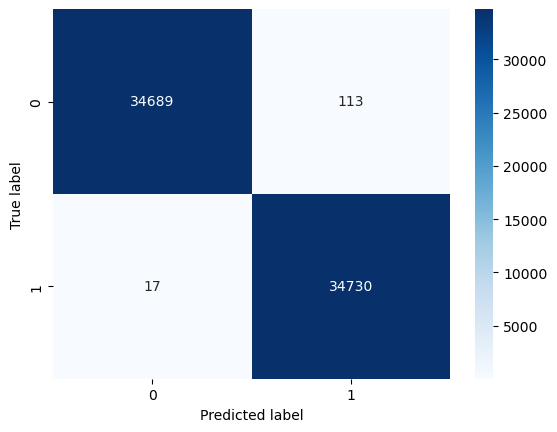

In [36]:
# Compute the confusion matrix
cm_skmet = confusion_matrix(y_val, pred2)

# Plot the confusion matrix with custom formatting
sns.heatmap(cm_skmet, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [37]:
print(classification_report(y_val, pred2, digits=4))

              precision    recall  f1-score   support

           0     0.9995    0.9968    0.9981     34802
           1     0.9968    0.9995    0.9981     34747

    accuracy                         0.9981     69549
   macro avg     0.9981    0.9981    0.9981     69549
weighted avg     0.9981    0.9981    0.9981     69549



### Random Forest

In [38]:
mod3 = RandomForestClassifier(random_state=1)
mod3.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [39]:
pred3 = mod3.predict(X_val)

In [40]:
pd.crosstab(y_val, pred3)

col_0,0,1
is_fraud,,
0,34783,19
1,2,34745


In [41]:
model_dict = {'model': "Random Forest"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_val, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,Logistic Regression,0.931976,0.938164,0.924799,0.931434,2.451833,0.931970
1,Decision Tree,0.998131,0.996757,0.999511,0.998132,0.067372,0.998132
2,Random Forest,0.999698,0.999453,0.999942,0.999698,0.010883,0.999698


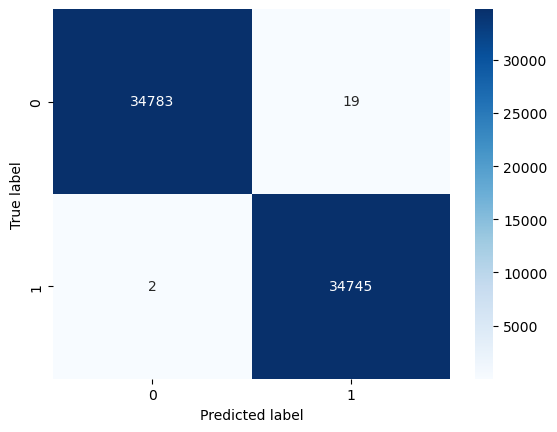

In [42]:
# Compute the confusion matrix
cm_skmet = confusion_matrix(y_val, pred3)

# Plot the confusion matrix with custom formatting
sns.heatmap(cm_skmet, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [43]:
print(classification_report(y_val, pred3, digits=4))

              precision    recall  f1-score   support

           0     0.9999    0.9995    0.9997     34802
           1     0.9995    0.9999    0.9997     34747

    accuracy                         0.9997     69549
   macro avg     0.9997    0.9997    0.9997     69549
weighted avg     0.9997    0.9997    0.9997     69549



### Adaptive Boosting (ADABoost)

In [44]:
mod4 = AdaBoostClassifier(random_state=1)
mod4.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

In [45]:
pred4 = mod4.predict(X_val)

In [46]:
pd.crosstab(y_val, pred4)

col_0,0,1
is_fraud,,
0,33734,1068
1,1943,32804


In [47]:
model_dict = {'model': "Adaptive Boosting (ADABoost)"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_val, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,Logistic Regression,0.931976,0.938164,0.924799,0.931434,2.451833,0.931970
1,Decision Tree,0.998131,0.996757,0.999511,0.998132,0.067372,0.998132
2,Random Forest,0.999698,0.999453,0.999942,0.999698,0.010883,0.999698
3,Adaptive Boosting (ADABoost),0.956707,0.968470,0.944082,0.956120,1.560446,0.956697


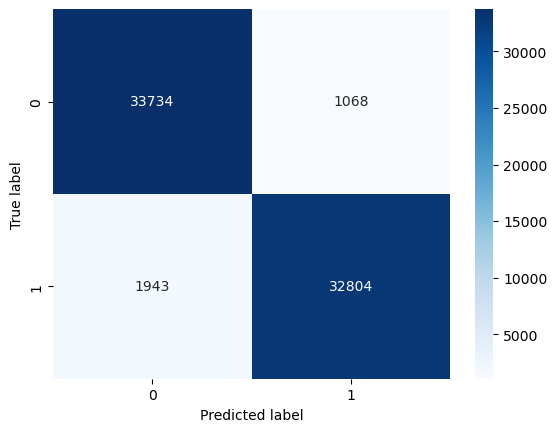

In [48]:
# Compute the confusion matrix
cm_skmet = confusion_matrix(y_val, pred4)

# Plot the confusion matrix with custom formatting
sns.heatmap(cm_skmet, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [49]:
print(classification_report(y_val, pred4, digits=4))

              precision    recall  f1-score   support

           0     0.9455    0.9693    0.9573     34802
           1     0.9685    0.9441    0.9561     34747

    accuracy                         0.9567     69549
   macro avg     0.9570    0.9567    0.9567     69549
weighted avg     0.9570    0.9567    0.9567     69549



### Gradient Boosting Machine (GBM)

In [50]:
mod5 = GradientBoostingClassifier(random_state=1)
mod5.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [51]:
# Make predictions on the validation set
pred5 = mod5.predict(X_val)

In [52]:
pd.crosstab(y_val, pred5)

col_0,0,1
is_fraud,,
0,34214,588
1,1069,33678


In [53]:
model_dict = {'model': "Gradient Boosting Machine (GBM)"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_val, pred5)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,Logistic Regression,0.931976,0.938164,0.924799,0.931434,2.451833,0.931970
1,Decision Tree,0.998131,0.996757,0.999511,0.998132,0.067372,0.998132
2,Random Forest,0.999698,0.999453,0.999942,0.999698,0.010883,0.999698
3,Adaptive Boosting (ADABoost),0.956707,0.968470,0.944082,0.956120,1.560446,0.956697
4,Gradient Boosting Machine (GBM),0.976175,0.982840,0.969235,0.975990,0.858737,0.976170


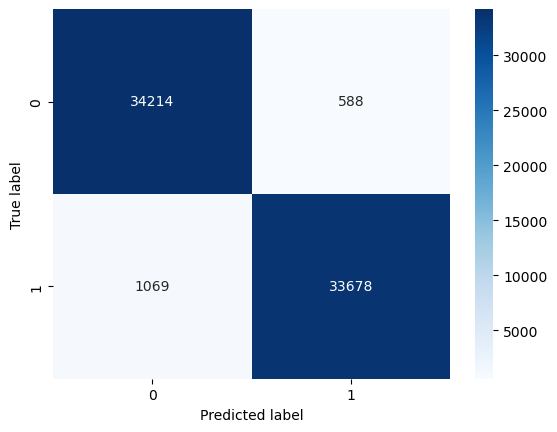

In [54]:
# Compute the confusion matrix
cm_skmet = confusion_matrix(y_val, pred5)

# Plot the confusion matrix with custom formatting
sns.heatmap(cm_skmet, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [55]:
print(classification_report(y_val, pred5, digits=4))

              precision    recall  f1-score   support

           0     0.9697    0.9831    0.9764     34802
           1     0.9828    0.9692    0.9760     34747

    accuracy                         0.9762     69549
   macro avg     0.9763    0.9762    0.9762     69549
weighted avg     0.9763    0.9762    0.9762     69549



### Support Vector Machine (SVM)

In [56]:
mod6 = SVC()
mod6.fit(X_train,y_train)

SVC()

In [57]:
pred6 = mod6.predict(X_val)

In [58]:
pd.crosstab(y_val, pred6)

col_0,0,1
is_fraud,,
0,31211,3591
1,4457,30290


In [59]:
model_dict = {'model': "Support Vector Machine (SVM)"}
new_row = pd.DataFrame([{**model_dict, **classificationMetrics(y_val, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
0,Logistic Regression,0.931976,0.938164,0.924799,0.931434,2.451833,0.931970
1,Decision Tree,0.998131,0.996757,0.999511,0.998132,0.067372,0.998132
2,Random Forest,0.999698,0.999453,0.999942,0.999698,0.010883,0.999698
3,Adaptive Boosting (ADABoost),0.956707,0.968470,0.944082,0.956120,1.560446,0.956697
4,Gradient Boosting Machine (GBM),0.976175,0.982840,0.969235,0.975990,0.858737,0.976170
5,Support Vector Machine (SVM),0.884283,0.894011,0.871730,0.882730,4.170863,0.884273


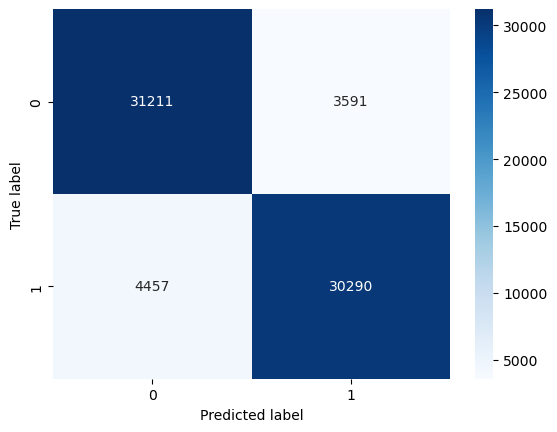

In [60]:
# Compute the confusion matrix
cm_skmet = confusion_matrix(y_val, pred6)

# Plot the confusion matrix with custom formatting
sns.heatmap(cm_skmet, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [61]:
print(classification_report(y_val, pred6, digits=4))

              precision    recall  f1-score   support

           0     0.8750    0.8968    0.8858     34802
           1     0.8940    0.8717    0.8827     34747

    accuracy                         0.8843     69549
   macro avg     0.8845    0.8843    0.8843     69549
weighted avg     0.8845    0.8843    0.8843     69549



## Model Selection

Accuracy - Measures how many predictions were correct overall.<br>
Precision - Out of all the positive predictions, how many were actually correct, High precision means fewer false alarms (False Positives)<br>
Recall - Out of all actual positives, how many did we correctly identify, High recall means fewer missed cases<br>
Specificity - Out of all actual negatives, how many did we correctly classify as negative, High specificity means fewer false fraud alerts (False Positives)<br>
F1 - A balance between Precision and Recall. Useful when the dataset is imbalanced <br>

In [62]:
models_list.sort_values('Recall')

,model,Accuracy,Precision,Recall,f1-score,Log-loss,AUC
5,Support Vector Machine (SVM),0.884283,0.894011,0.871730,0.882730,4.170863,0.884273
0,Logistic Regression,0.931976,0.938164,0.924799,0.931434,2.451833,0.931970
3,Adaptive Boosting (ADABoost),0.956707,0.968470,0.944082,0.956120,1.560446,0.956697
4,Gradient Boosting Machine (GBM),0.976175,0.982840,0.969235,0.975990,0.858737,0.976170
1,Decision Tree,0.998131,0.996757,0.999511,0.998132,0.067372,0.998132
2,Random Forest,0.999698,0.999453,0.999942,0.999698,0.010883,0.999698


# Finetuning

### Hyperparameter Tuning:

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

### Random Forest criterion Entropy

In [64]:
# 1. Random Forest criterion Entropy
clf_entropy = RandomForestClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [65]:
# Prediction with Entropy
y_pred_entropy = clf_entropy.predict(X_val)
accuracy_entropy = accuracy_score(y_val, y_pred_entropy)
print(f"Accuracy with Entropy: {accuracy_entropy:.6f}")

Accuracy with Entropy: 0.999641


In [70]:
print(confusion_matrix(y_val,y_pred_entropy))

[[34780    22]
 [    3 34744]]


### Random Forest with Gini impurity Index

In [71]:
# 2. Random Forest with Gini Index
clf_gini = RandomForestClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
#Prediction with Gini Index
y_pred_gini = clf_gini.predict(X_val)
accuracy_gini = accuracy_score(y_val, y_pred_gini)
print(f"\nAccuracy with Gini Index: {accuracy_gini:.6f}")


Accuracy with Gini Index: 0.999698


In [74]:
print(confusion_matrix(y_val,y_pred_gini))

[[34784    18]
 [    3 34744]]


### Random Forest with Gridsearch

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [76]:
# Reduced number of options for each hyperparameter
n_estimators = [100, 200, 300]  # Fewer values for the number of trees
max_features = ['auto','sqrt']  #  # Number of features to consider at each split
max_depth = [10, 20, 30, 40, None]  # Fewer values for max depth
min_samples_split = [2, 5, 10]  # Keep essential options only
min_samples_leaf = [1, 2, 4]  # Reduced options for leaf samples
bootstrap = [True, False]  # Keep as is

# Create a lighter random grid
lighter_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

print(lighter_grid)

# Reduced number of iterations and cross-validation folds
rf_random = RandomizedSearchCV(estimator=mod3, param_distributions=lighter_grid, n_iter=25, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

### Running base Model vs best model after fine tuning

Model evaluation

In [77]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_val)
base_accuracy = classificationMetrics(y_val, y_pred)

In [78]:
print(confusion_matrix(y_val, y_pred))

[[34784    18]
 [    3 34744]]


In [79]:
# Display results
accuracy_base_model = accuracy_score(y_val, y_pred)
print(f"\nAccuracy with base_model Index: {accuracy_base_model:.6f}")


Accuracy with base_model Index: 0.999698


In [80]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_val)
random_accuracy = classificationMetrics(y_val, y_pred)

In [81]:
print(confusion_matrix(y_val, y_pred))

[[34789    13]
 [    3 34744]]


In [82]:
# Display results
accuracy_best_random = accuracy_score(y_val, y_pred)
print(f"\nAccuracy with best_random Index: {accuracy_best_random:.6f}")


Accuracy with best_random Index: 0.999770


### Comparisson

In [83]:
# Calculate the percentage difference for the first value of each model
percentage_diff = abs(accuracy_best_random - accuracy_base_model) / accuracy_best_random * 100

print(f"Percentage difference between the first values: {percentage_diff:.6f}%")

Percentage difference between the first values: 0.007191%


The difference is extremely small, suggesting that the first model's accuracy is slightly higher than the second model's, but the difference is negligible in terms of overall performance.

In [84]:
from scipy import stats
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from statsmodels.stats.contingency_tables import mcnemar

In [85]:
base_accuracy = [value for key, value in base_accuracy.items()]
random_accuracy = [value for key, value in random_accuracy.items()]

# Perform paired t-test to compare accuracies
t_stat, p_value = stats.ttest_rel(base_accuracy, random_accuracy)
print(f"Paired T-test: t-statistic = {t_stat}, p-value = {p_value}")

Paired T-test: t-statistic = 0.83731199968065, p-value = 0.44059061804135724


#### t-statistic:
The t-statistic value represents how much the means of the two sets of accuracy values differ in standard error units. A higher absolute t-statistic indicates a larger difference between the two sets of accuracies, while a smaller t-statistic suggests a smaller difference.

In this case, the t-statistic is 0.83, which is relatively small. This suggests that the difference between the accuracies of the two models is not very large when accounting for variability in the data.
#### p-value:
The p-value tests the null hypothesis that the two sets of data (model accuracies in this case) come from distributions with equal means.

A p-value of 0.44 is greater than the commonly used threshold of 0.05. This means there is no statistically significant difference between the accuracies of the two models.
In simpler terms, the p-value indicates that we fail to reject the null hypothesis, which suggests that the difference in accuracy between the two models could have occurred due to random chance.
#### Conclusion:
The results suggest that there is no significant difference between the accuracies of the two models.
Since the p-value is greater than 0.05, we conclude that both models perform similarly in terms of accuracy. The observed difference in accuracy is not statistically significant.
In essence, the t-test shows that, based on the data you provided, there isn't enough evidence to say one model is better than the other in terms of accuracy.

## Conclusion 

In [86]:
model = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=300, random_state=1)
model.fit(X_train, y_train)

y_pred_1 = model.predict(X_val)

In [87]:
pd.crosstab(y_val, y_pred_1)

col_0,0,1
is_fraud,,
0,34789,13
1,3,34744


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Example data
# y_test = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # True labels
# y_pred = pred3

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

# Metrics calculation
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
specificity = tn / (tn + fp)
f1 = f1_score(y_val, y_pred)

# Display results
print(f"Confusion Matrix:\nTP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall (Sensitivity): {recall:.5f}")
print(f"Specificity: {specificity:.5f}")
print(f"F1 Score: {f1:.5f}")


Confusion Matrix:
TP: 34744, FP: 13, TN: 34789, FN: 3
Accuracy: 0.99977
Precision: 0.99963
Recall (Sensitivity): 0.99991
Specificity: 0.99963
F1 Score: 0.99977


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Example data
# y_test = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # True labels
# y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]  # Predicted labels

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

# Metrics calculation
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
specificity = tn / (tn + fp)
f1 = f1_score(y_val, y_pred)

# Create a DataFrame for the metrics
metrics_table = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall (Sensitivity)", "Specificity", "F1 Score"],
    "Value": [accuracy, precision, recall, specificity, f1]
})

# Display the table
metrics_table


,Metric,Value
0,Accuracy,0.999770
1,Precision,0.999626
2,Recall (Sensitivity),0.999914
3,Specificity,0.999626
4,F1 Score,0.999770


## Testing the model with X_test and y_test

In [90]:
# model = RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
#                        n_estimators=300, random_state=1)
# model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

In [91]:
y_pred_test.shape

(69550,)

In [92]:
y_val.shape

(69549,)

In [93]:
print(confusion_matrix(y_pred_test, y_test))

[[34867     3]
 [   17 34663]]


In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Example data
# y_test = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # True labels
# y_pred = pred3

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_pred_test, y_test).ravel()

# Metrics calculation
accuracy = accuracy_score(y_pred_test, y_test)
precision = precision_score(y_pred_test, y_test)
recall = recall_score(y_pred_test, y_test)
specificity = tn / (tn + fp)
f1 = f1_score(y_pred_test, y_test)

# Display results
print(f"Confusion Matrix:\nTP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall (Sensitivity): {recall:.5f}")
print(f"Specificity: {specificity:.5f}")
print(f"F1 Score: {f1:.5f}")

Confusion Matrix:
TP: 34663, FP: 3, TN: 34867, FN: 17
Accuracy: 0.99971
Precision: 0.99991
Recall (Sensitivity): 0.99951
Specificity: 0.99991
F1 Score: 0.99971


## Final Conclusion 

1. **Accuracy (0.99971)**: The model correctly classifies almost all instances, with very few errors, but this can be misleading due to the balanced data.
2. **Precision (0.99991)**: The model flags fraudulent transactions with high accuracy, resulting in almost no false positives.
3. **Recall (0.99951)**: The model catches nearly all fraudulent transactions, with very few false negatives.
4. **Specificity (0.99991)**: It correctly identifies legitimate transactions with almost no false positives.
5. **F1 Score (0.99971)**: The harmonic mean of precision and recall is nearly perfect, indicating a well-balanced model.

When the dataset is balanced using techniques like SMOTETomek (which combines SMOTE and Tomek links), the number of fraudulent and non-fraudulent transactions becomes equal, and this balancing impacts model performance in the following ways:

#### Balanced Class Distribution:

In a balanced dataset, the model is equally exposed to both classes (fraudulent and legitimate), so it doesn't suffer from class imbalance. This allows it to learn better decision boundaries between the two classes.

The model doesn’t "overlearn" the majority class (legitimate transactions) as it would in an imbalanced dataset. This can make the model appear more accurate because it has a fair chance of detecting both fraudulent and legitimate transactions.

#### Impact on Evaluation Metrics:

In a balanced dataset, accuracy can become a less misleading metric because the model's prediction is tested across equal numbers of both classes.

Recall, precision, and F1 score are more optimized because the model is trained on an equal number of fraud and non-fraud cases, allowing it to give better attention to fraud detection.

#### Near-Perfect Results:

The balanced dataset essentially allows the model to achieve near-perfect recall, precision, and F1 score by preventing it from biasing towards the majority class (legitimate transactions).

## Test with the imbalanced dataset on the model

In [95]:
df_test = pd.read_pickle('df_feature_selection.pkl')

In [102]:
y1_test.value_counts()

is_fraud
0    74518
1      417
Name: count, dtype: int64

In [96]:
# Splitting original dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(df_test.drop('is_fraud',axis=1), df_test['is_fraud'], test_size=0.3, random_state=42)

In [97]:
y_pred_df_test = model.predict(X1_test)

In [99]:
print(confusion_matrix(y_pred_df_test, y1_test))

[[74499    30]
 [   19   387]]


In [100]:
# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_pred_df_test, y1_test).ravel()

# Metrics calculation
accuracy = accuracy_score(y_pred_df_test, y1_test)
precision = precision_score(y_pred_df_test, y1_test)
recall = recall_score(y_pred_df_test, y1_test)
specificity = tn / (tn + fp)
f1 = f1_score(y_pred_df_test, y1_test)

# Display results
print(f"Confusion Matrix:\nTP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall (Sensitivity): {recall:.5f}")
print(f"Specificity: {specificity:.5f}")
print(f"F1 Score: {f1:.5f}")

Confusion Matrix:
TP: 387, FP: 30, TN: 74499, FN: 19
Accuracy: 0.99935
Precision: 0.92806
Recall (Sensitivity): 0.95320
Specificity: 0.99960
F1 Score: 0.94046


1. **High Recall (95.32%)**: The model detects most fraudulent transactions, minimizing false negatives, which is critical for fraud detection.
2. **High Precision (92.81%)**: The model flags fraud cases accurately, with few false positives, ensuring legitimate transactions aren’t disrupted.
3. **High Specificity (99.96%)**: The model effectively identifies legitimate transactions, preventing unnecessary fraud flags.
4. **Strong F1 Score (94.05%)**: The model maintains a good balance between recall and precision, providing reliable performance for fraud detection.

Despite the dataset being imbalanced, the model performs well by effectively detecting fraud without over-flagging legitimate transactions, making it suitable for real-world applications.